In [1]:
# Import collections to use collections.OrderedSet to group DAs by year.
# This may possibly be replaced with a pandas function.
import collections

# Import matplotlib for plotting diagrams.
import matplotlib.pyplot as plt

# Import numpy for mathematical functions.
import numpy as np

# Import pandas to read and manipulate data.
import pandas as pd

# Address a warning from matplotlib.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Set the default font size for all plots.
plt.rcParams["font.size"] = 20

In [3]:
# Import the processed CSV file which is located in the data folder (next to the notebook).
# This CSV file is generated by the "processing" notebook, which should be run first.
# We tell pandas that these three columns contain date information.
raw_data = pd.read_csv("data/processed.csv",
                       parse_dates=["Lodged Date", "Exhibition Closed Date", "Decision Date"])

# Check the dataset has the expected data.
raw_data

,App Number,Address,Street,Suburb,Description,Lodged Date,Exhibition Closed Date,Decision,Officer,Est Cost,Decision Date,On Exhibition,Assessment Time,Lodged Year,Latitude,Longitude
0,D/2004/1357,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Alterations and additions to existing restaura...,2004-11-08,2005-03-02,Approved with Conditions,Sally Grebe,28000,2005-09-13,NaN,309.0,2004,-33.881173,151.217723
1,D/2010/3,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Change of use and fit out of the premises as a...,2010-01-04,2010-02-01,Approved with Conditions,Peggy Wong,185000,2010-06-22,NaN,169.0,2010,-33.881173,151.217723
2,D/2010/1026,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Fit out and use ground floor as a licenced res...,2010-07-05,2010-08-04,Approved with Conditions,Emma Brown,35000,2010-11-12,NaN,130.0,2010,-33.881173,151.217723
3,FA/2010/190,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Application for outdoor seating facilities ass...,2010-07-15,2010-08-09,Approved Subject to Lease,Emma Brown,0,2010-11-12,NaN,120.0,2010,-33.881173,151.217723
4,D/2010/1026/A,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96(1a) modification of the approval fo...,2010-11-26,NaT,Approved with Conditions,Peggy Wong,0,2011-01-14,NaN,49.0,2010,-33.881173,151.217723
5,D/2010/1026/B,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96(1A) modification to Condition 26(d)...,2010-12-21,NaT,Approved with Conditions,Peggy Wong,0,2011-03-22,NaN,91.0,2010,-33.881173,151.217723
6,D/2010/1026/C,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96 application to delete Conditions 10...,2011-03-10,2011-04-12,Refused,Alexander Scott,35000,2011-07-11,NaN,123.0,2011,-33.881173,151.217723
7,D/2011/1407,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Installation of a retractable awning on the ro...,2011-09-07,2011-10-11,Approved with Conditions,Alexander Scott,16000,2012-05-23,NaN,259.0,2011,-33.881173,151.217723
8,D/2010/1026/D,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96 application for licensed restaurant...,2011-10-18,2011-11-22,Refused,Alexander Scott,0,2012-03-02,NaN,136.0,2011,-33.881173,151.217723
9,RD/2010/1026/A,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Small Permits Appeals Panel review of Council'...,2012-03-30,2012-06-27,Refused,Alexander Scott,142,2012-08-01,NaN,124.0,2012,-33.881173,151.217723


In [4]:
# Define a variable that contains all applications that have been determined, i.e. have an assessment time.
determined = raw_data[raw_data["Assessment Time"] >= 0]
# Check the dataset.
determined

,App Number,Address,Street,Suburb,Description,Lodged Date,Exhibition Closed Date,Decision,Officer,Est Cost,Decision Date,On Exhibition,Assessment Time,Lodged Year,Latitude,Longitude
0,D/2004/1357,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Alterations and additions to existing restaura...,2004-11-08,2005-03-02,Approved with Conditions,Sally Grebe,28000,2005-09-13,NaN,309.0,2004,-33.881173,151.217723
1,D/2010/3,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Change of use and fit out of the premises as a...,2010-01-04,2010-02-01,Approved with Conditions,Peggy Wong,185000,2010-06-22,NaN,169.0,2010,-33.881173,151.217723
2,D/2010/1026,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Fit out and use ground floor as a licenced res...,2010-07-05,2010-08-04,Approved with Conditions,Emma Brown,35000,2010-11-12,NaN,130.0,2010,-33.881173,151.217723
3,FA/2010/190,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Application for outdoor seating facilities ass...,2010-07-15,2010-08-09,Approved Subject to Lease,Emma Brown,0,2010-11-12,NaN,120.0,2010,-33.881173,151.217723
4,D/2010/1026/A,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96(1a) modification of the approval fo...,2010-11-26,NaT,Approved with Conditions,Peggy Wong,0,2011-01-14,NaN,49.0,2010,-33.881173,151.217723
5,D/2010/1026/B,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96(1A) modification to Condition 26(d)...,2010-12-21,NaT,Approved with Conditions,Peggy Wong,0,2011-03-22,NaN,91.0,2010,-33.881173,151.217723
6,D/2010/1026/C,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96 application to delete Conditions 10...,2011-03-10,2011-04-12,Refused,Alexander Scott,35000,2011-07-11,NaN,123.0,2011,-33.881173,151.217723
7,D/2011/1407,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Installation of a retractable awning on the ro...,2011-09-07,2011-10-11,Approved with Conditions,Alexander Scott,16000,2012-05-23,NaN,259.0,2011,-33.881173,151.217723
8,D/2010/1026/D,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Section 96 application for licensed restaurant...,2011-10-18,2011-11-22,Refused,Alexander Scott,0,2012-03-02,NaN,136.0,2011,-33.881173,151.217723
9,RD/2010/1026/A,"215 Oxford Street, DARLINGHURST NSW 2010",Oxford Street,DARLINGHURST,Small Permits Appeals Panel review of Council'...,2012-03-30,2012-06-27,Refused,Alexander Scott,142,2012-08-01,NaN,124.0,2012,-33.881173,151.217723


In [5]:
# Define a variable that contains all applications that have not been determined.
not_determined = raw_data[raw_data["Assessment Time"].isnull()]
# Check the dataset.
not_determined

,App Number,Address,Street,Suburb,Description,Lodged Date,Exhibition Closed Date,Decision,Officer,Est Cost,Decision Date,On Exhibition,Assessment Time,Lodged Year,Latitude,Longitude
63,D/2017/1578,"390-396 Pitt Street, HAYMARKET NSW 2000",Pitt Street,HAYMARKET,The development application is being re-notifi...,2017-11-15,2019-03-05,NaN,Adrian McKeown,32293241,NaT,NaN,NaN,2017,-33.878326,151.207659
531,D/2019/310,"429-481 George Street, SYDNEY NSW 2000",George Street,SYDNEY,Internal fit out of the Martin and Stein Jewel...,2019-03-29,NaT,NaN,Peggy Wong,75000,NaT,NaN,NaN,2019,-33.871751,151.206687
533,D/2019/348,"429-481 George Street, SYDNEY NSW 2000",George Street,SYDNEY,Tenancy fitout of shop L032 and advertising gr...,2019-04-05,NaT,NaN,Marie Burge,169500,NaT,NaN,NaN,2019,-33.871751,151.206687
534,D/2019/398,"429-481 George Street, SYDNEY NSW 2000",George Street,SYDNEY,Proposed retail tenancy fitout and alterations...,2019-04-23,NaT,NaN,Claire Elek,150000,NaT,NaN,NaN,2019,-33.871751,151.206687
535,D/2019/330/A,"429-481 George Street, SYDNEY NSW 2000",George Street,SYDNEY,"S4.55(1a) Change to internal walls, display pa...",2019-04-23,NaT,NaN,Connor Mayoh,148170,NaT,NaN,NaN,2019,-33.871751,151.206687
536,D/2019/403,"429-481 George Street, SYDNEY NSW 2000",George Street,SYDNEY,Internal alterations to Shop 07-09 on Level 2 ...,2019-04-24,NaT,NaN,Charbel Touma,145000,NaT,NaN,NaN,2019,-33.871751,151.206687
684,D/2019/213,"2-6 Danks Street, WATERLOO NSW 2017",Danks Street,WATERLOO,Stratum Subdivision into two lots.,2019-03-07,2019-04-16,NaN,Michael Parkinson,0,NaT,NaN,NaN,2019,-33.897286,151.209799
756,D/2019/360,"185-211 Broadway, ULTIMO NSW 2007",Broadway,ULTIMO,Use of Shop 4a (Lot 5) as a food and drink pre...,2019-04-10,2019-05-02,NaN,Marcella Hager,140140,NaT,Yes,NaN,2019,-33.883978,151.195611
929,D/2014/1610/B,"138-196 Bourke Road, ALEXANDRIA NSW 2015",Bourke Road,ALEXANDRIA,Section 4.55 (2) modiication of consent to con...,2019-01-29,2019-02-21,NaN,Daniel Stanley,1123342,NaT,NaN,NaN,2019,-33.917070,151.191504
930,D/2019/342,"138-196 Bourke Road, ALEXANDRIA NSW 2015",Bourke Road,ALEXANDRIA,Alterations and additions to existing commerci...,2019-04-04,2019-04-26,NaN,Natalie Wells,214500,NaT,Yes,NaN,2019,-33.917070,151.191504


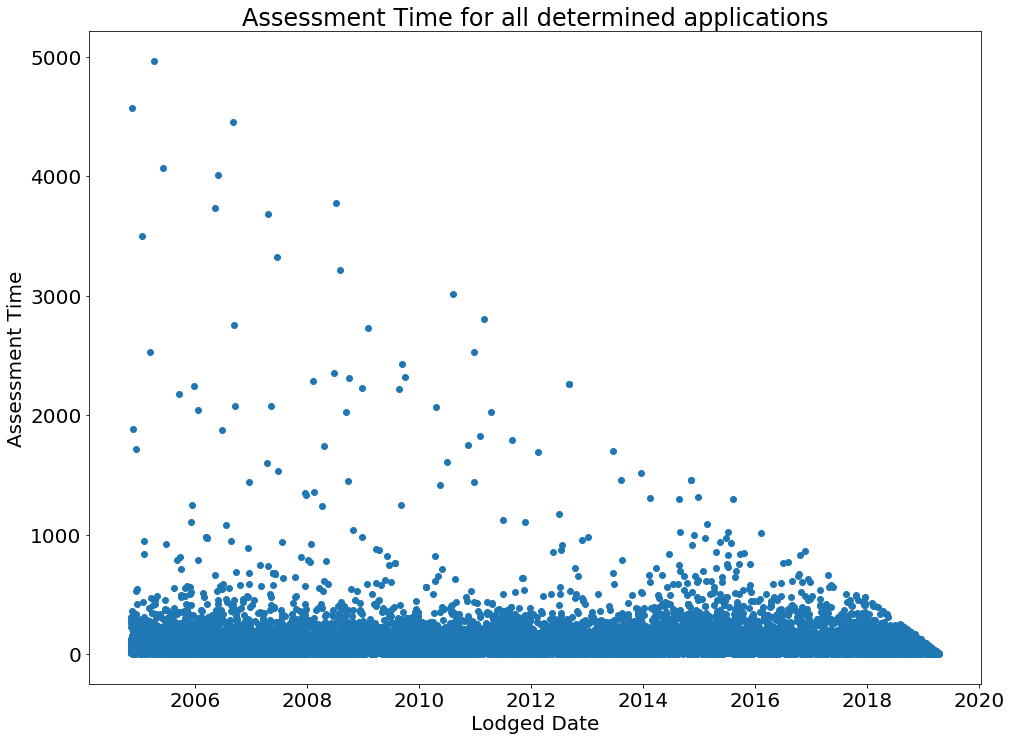

In [6]:
# Plot a scatter chart with the Lodged Date as the X axis and the Decision Span as the Y axis.
# This chart shows the variation in decision span over all years contained in the dataset.
# DAs with assessment time being NaN will not be plotted.
plt.figure(figsize = (16,12))
plt.scatter(determined["Lodged Date"],
            determined["Assessment Time"])
plt.xlabel("Lodged Date")
plt.ylabel("Assessment Time")
plt.title("Assessment Time for all determined applications")
plt.show()

In [7]:
# The dataset contains both standard development applications (DA) as well as footpath usage applications (FA).
# The two categories are different in nature and therefore should be analysed separately.

# Define a variable that contains all FA data.
determined_fa = determined[determined["App Number"].str.startswith("FA/")].copy()
# Define a variable that contains all non-FA data (i.e. DA data).
determined_da = determined[~determined["App Number"].str.startswith("FA/")].copy()

# Print the total number of DAs and FAs.
# The f-string is a Python 3.6 improved string formatting syntax.
print(f"There are {len(determined_da)} DA applications.")
print(f"There are {len(determined_fa)} FA applications.")

There are 39620 DA applications.
There are 2879 FA applications.


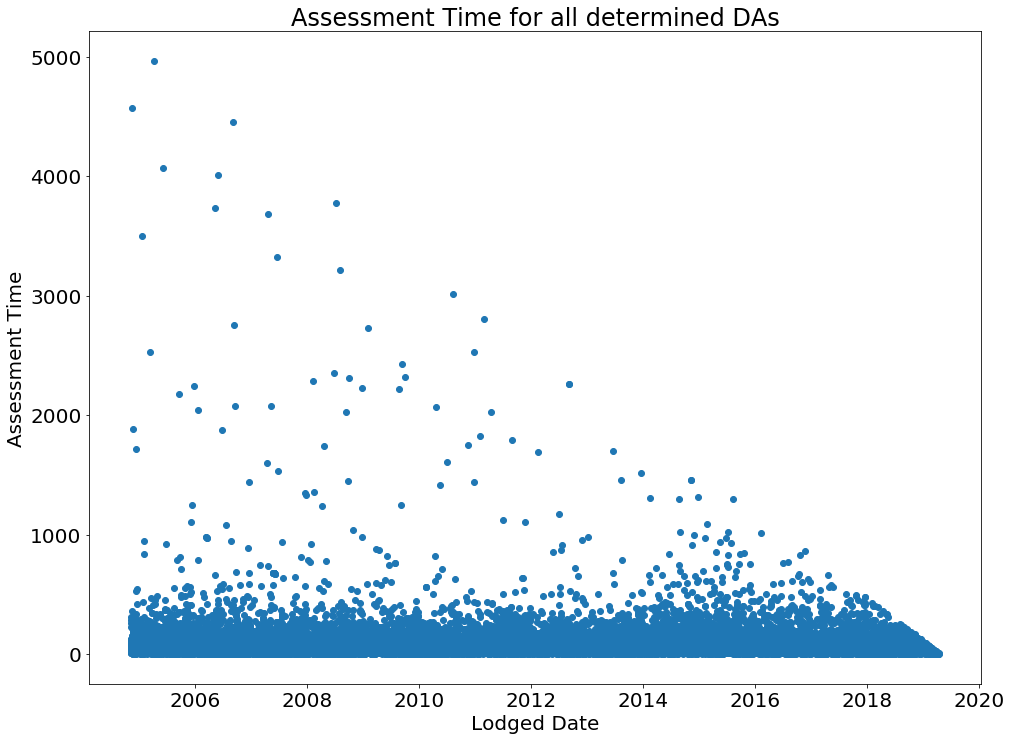

In [8]:
# Plot a scatter chart for DAs only.
plt.figure(figsize = (16,12))
plt.scatter(determined_da["Lodged Date"],
            determined_da["Assessment Time"])
plt.xlabel("Lodged Date")
plt.ylabel("Assessment Time")
plt.title("Assessment Time for all determined DAs")
plt.show()

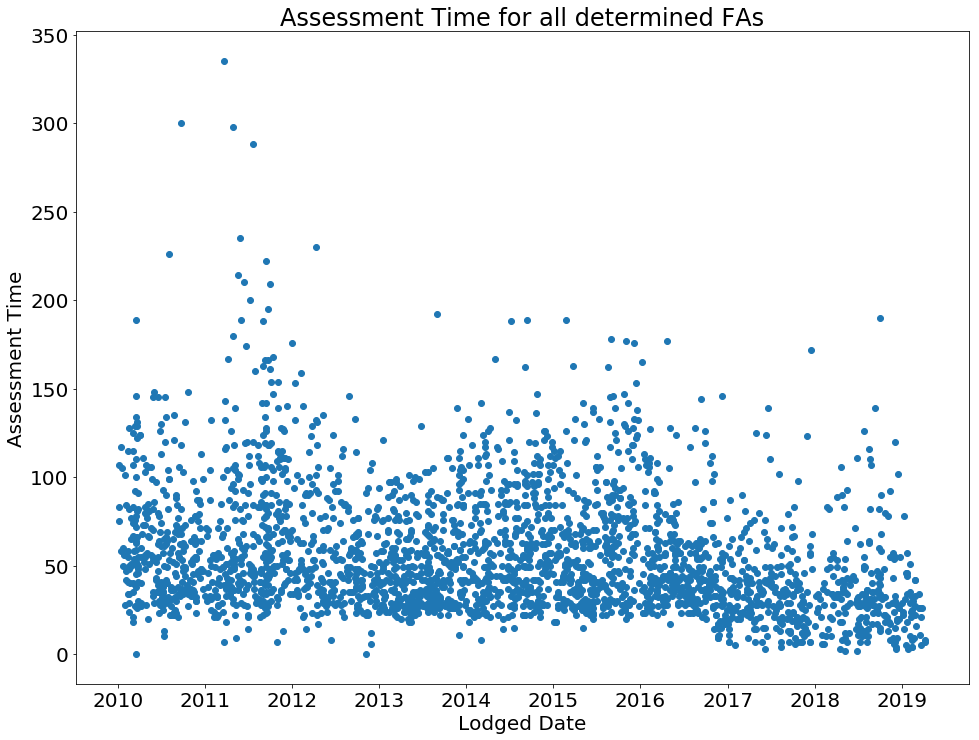

In [9]:
# Plot a scatter chart for FAs only.
plt.figure(figsize = (16,12))
plt.scatter(determined_fa["Lodged Date"],
            determined_fa["Assessment Time"])
plt.xlabel("Lodged Date")
plt.ylabel("Assessment Time")
plt.title("Assessment Time for all determined FAs")
plt.show()

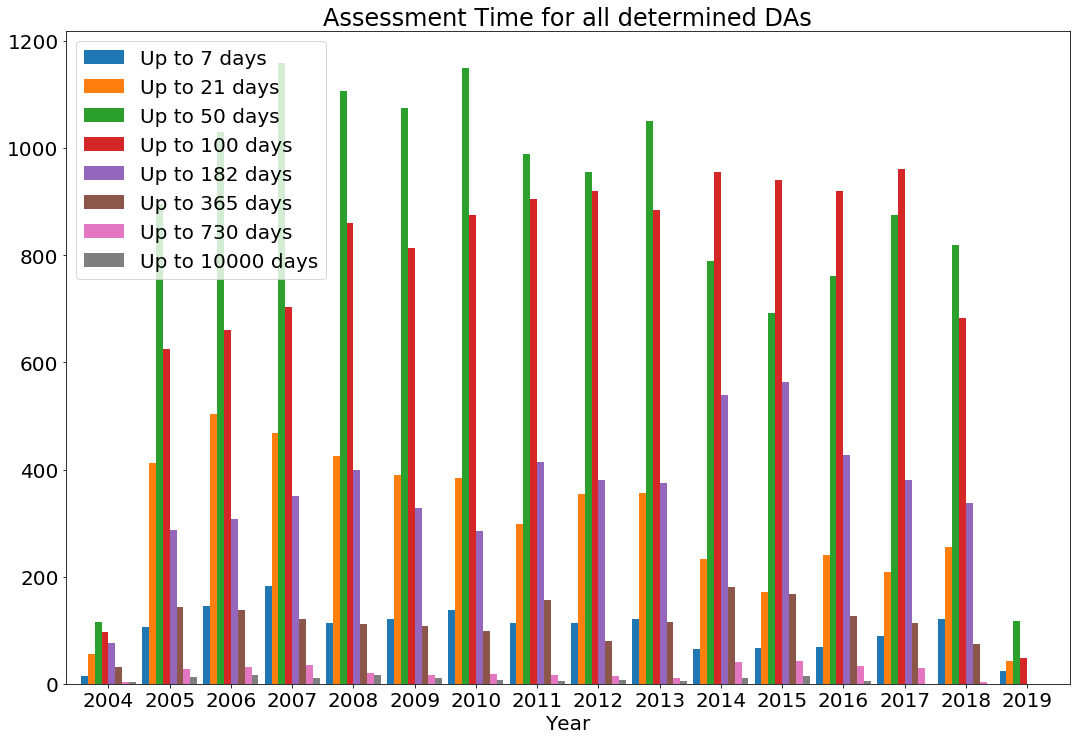

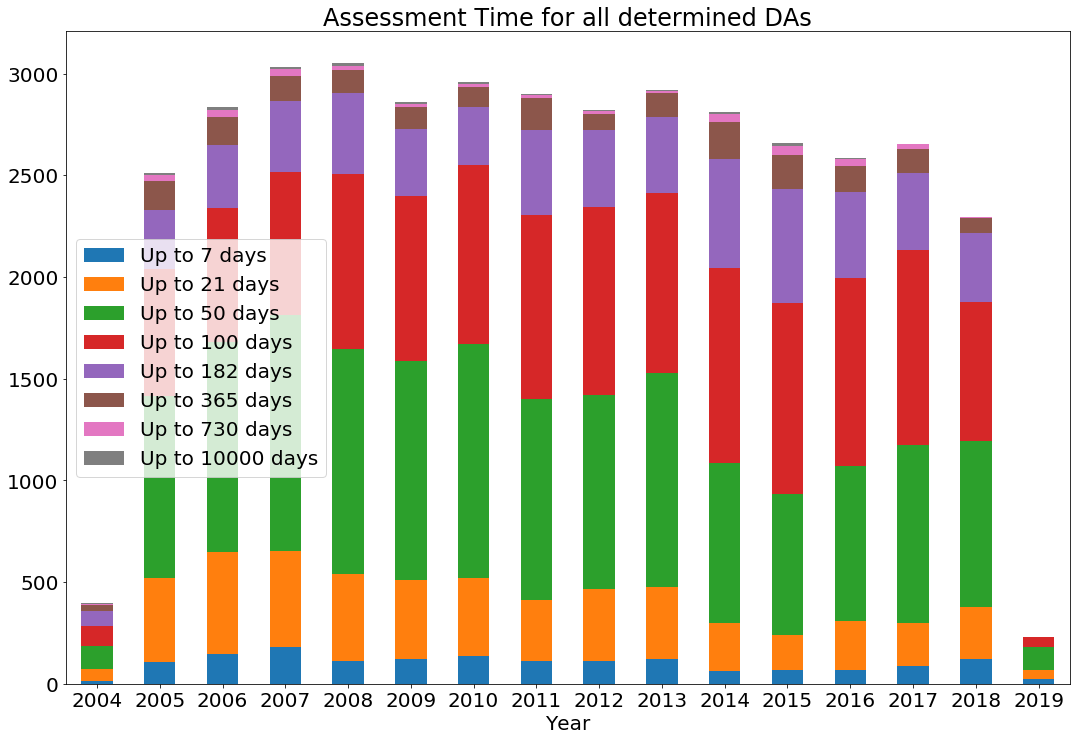

In [10]:
# Clustering applications by assessment time into 8 groups.
assessment_time_buckets = [
    0,
    7,   # 1 week
    21,  # 3 weeks
    50,  # 1.5 month
    100, # 3 months
    182, # 6 months
    365, # 1 year
    730, # 2 years
    10000 # more than 2 years
]

# Create a new array.
yearly_assessment_time_stats = []

# Loop through all years in the dataset.
# For each year in the dataset, gather all applications within the year.
# Group them by assessment_time_buckets, then count the number of entries into each bucket.
# Finally, create a new row in yearly_assessment_time_stats with the Year and the count for each bucket.
years = range(2004, 2020)
for year in years:
    # Select all determined applications in the year.
    determined_in_year = determined_da[determined_da["Lodged Date"].dt.year == year]
    # Group determined applications by assessment time.
    bucketed = determined_in_year.groupby(pd.cut(determined_in_year["Assessment Time"], assessment_time_buckets))
    # Calculate the count of applications in each assessment time bucket.
    counts = bucketed.size()
    # Create a dictionary to store the counts for each bucket.
    # We use collections.OrderedDict() instead of {} because the columns would otherwise be in a random order.
    stats_in_year = collections.OrderedDict({
        "Year": year,
    })
    for bucket_limit in assessment_time_buckets[1:]:
        # Set the column "Up to ... days" to the corresponding count.
        stats_in_year[f"Up to {bucket_limit} days"] = counts[bucket_limit]
    # Append the row of counts for this year to the list.
    yearly_assessment_time_stats.append(stats_in_year)

# Transform the list of counts by year into a pandas DataFrame.
yearly_assessment_time_stats = pd.DataFrame(yearly_assessment_time_stats)

yearly_assessment_time_stats.plot.bar(title="Assessment Time for all determined DAs",
                                      x="Year",
                                      rot=0,
                                      figsize=(18, 12),
                                      width=0.9)
yearly_assessment_time_stats.plot.bar(title="Assessment Time for all determined DAs",
                                      stacked=True,
                                      x="Year",
                                      rot=0,
                                      figsize=(18, 12))

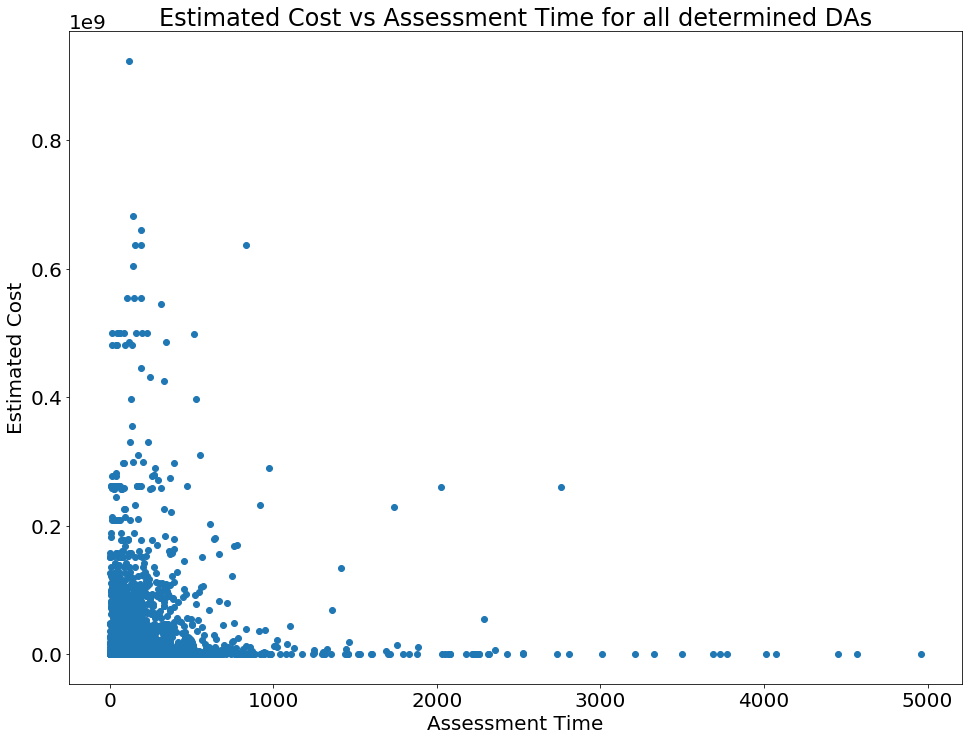

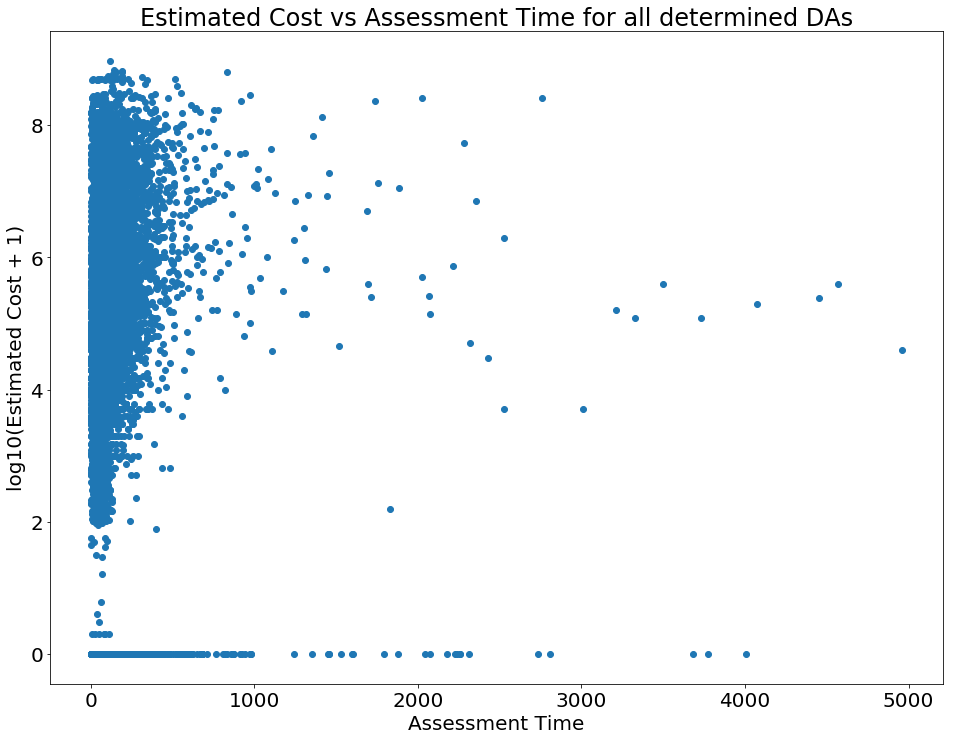

In [11]:
# Plot a scatter chart of assessment time per estimated cost for determined DAs.
plt.figure(figsize = (16,12))
plt.scatter(determined_da["Assessment Time"],
            determined_da["Est Cost"])
plt.xlabel("Assessment Time")
plt.ylabel("Estimated Cost")
plt.title("Estimated Cost vs Assessment Time for all determined DAs")
plt.show()

# Plot the same figure with a logarithmic scale.
plt.figure(figsize = (16,12))
plt.scatter(determined_da["Assessment Time"],
            np.log10(determined_da["Est Cost"] + 1))
plt.xlabel("Assessment Time")
plt.ylabel("log10(Estimated Cost + 1)")
plt.title("Estimated Cost vs Assessment Time for all determined DAs")
plt.show()

In [12]:
determined_da.sort_values(by="Est Cost").tail(10)

,App Number,Address,Street,Suburb,Description,Lodged Date,Exhibition Closed Date,Decision,Officer,Est Cost,Decision Date,On Exhibition,Assessment Time,Lodged Year,Latitude,Longitude
8978,D/2015/1049/B,"1 Alfred Street, SYDNEY NSW 2000",Alfred Street,SYDNEY,Section 96(2) modification of State Significan...,2016-10-31,2017-05-10,Approved with Conditions,Michaela Briggs,554917000,2017-05-11,NaN,192.0,2016,-33.861806,151.208533
8971,D/2015/1049/A,"1 Alfred Street, SYDNEY NSW 2000",Alfred Street,SYDNEY,Section 96(2) modification of State Significan...,2016-04-26,2016-11-16,Approved with Conditions,Michaela Briggs,554917000,2016-08-11,NaN,107.0,2016,-33.861806,151.208533
8970,D/2015/1049,"1 Alfred Street, SYDNEY NSW 2000",Alfred Street,SYDNEY,THIS APPLICATION WAS ISSUED DEFERRED COMMENCEM...,2015-07-17,2016-01-31,Deferred Commencement,Natasha Ridler,554917000,2015-12-10,NaN,146.0,2015,-33.861806,151.208533
6658,D/2015/929/B,"50 Bridge Street, SYDNEY NSW 2000",Bridge Street,SYDNEY,S96(1A) - Modifications to Condition 5 to seek...,2017-08-25,NaT,Approved with Conditions,Shannon Rickersey,604100000,2018-01-11,NaN,139.0,2017,-33.862866,151.211589
25460,D/2015/966,"57 Ashmore Street, ERSKINEVILLE NSW 2043",Ashmore Street,ERSKINEVILLE,Stage 1 Application for building envelopes for...,2015-07-09,2016-08-15,Approved - Deferred Commencement Activated,Christopher Ashworth,636739189,2017-10-18,NaN,832.0,2015,-33.903935,151.189286
16929,D/2015/966/A,"165-175 Mitchell Road, ERSKINEVILLE NSW 2043",Mitchell Road,ERSKINEVILLE,Section 96(2) modification of Stage 1 consent ...,2017-05-25,2017-10-26,Approved with Conditions,Christopher Ashworth,636739189,2017-11-30,NaN,189.0,2017,-33.905820,151.188166
41500,D/2015/966/B,"149 Mitchell Road, ERSKINEVILLE NSW 2043",Mitchell Road,ERSKINEVILLE,Section 4.55 (1A) modification application see...,2018-07-04,NaT,Approved with Conditions,Shannon Rickersey,636739189,2018-12-03,NaN,152.0,2018,-33.904223,151.188509
6504,D/2013/1942,"33 Alfred Street, SYDNEY NSW 2000",Alfred Street,SYDNEY,STAGE 1 DEVELOPMENT APPLICATION for the redeve...,2013-12-12,2014-01-24,Approved with Conditions,Tim Wise,660000000,2014-06-19,NaN,189.0,2013,-33.862462,151.211462
6655,D/2015/929,"50 Bridge Street, SYDNEY NSW 2000",Bridge Street,SYDNEY,"Stage 2 DA for the partial retention, but subs...",2015-07-02,2015-09-07,Approved with Conditions,Shannon Rickersey,682055000,2015-11-19,NaN,140.0,2015,-33.862866,151.211589
22436,D/2007/353/E,"41-45 Bourke Road, ALEXANDRIA NSW 2015",Bourke Road,ALEXANDRIA,Deletion of condition 71 requiring the buildin...,2011-10-25,NaT,Refused,Kate Wedgwood,923205203,2012-02-21,NaN,119.0,2011,-33.910999,151.193793


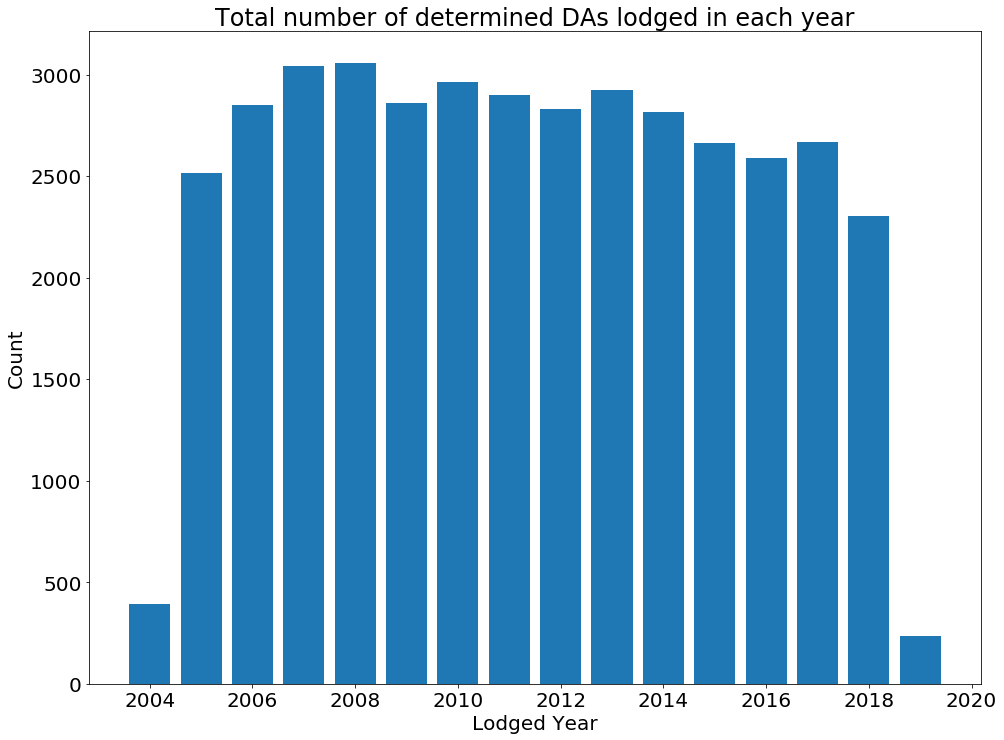

In [13]:
# Plot the total number of determined DAs per year.
determined_das_count_per_year = determined_da["Lodged Year"].groupby(determined_da["Lodged Year"]).count()

plt.figure(figsize = (16,12))
plt.bar(determined_das_count_per_year.index, determined_das_count_per_year)
plt.xlabel("Lodged Year")
plt.ylabel("Count")
plt.title("Total number of determined DAs lodged in each year")
plt.show()

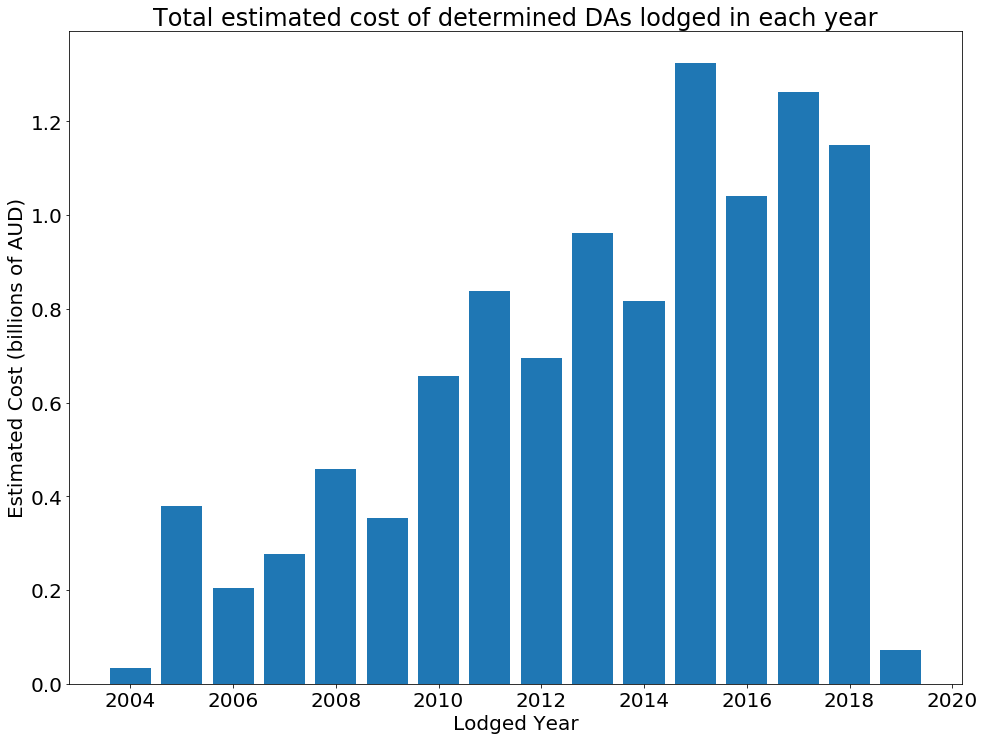

In [14]:
# Plot the total cost of determined DAs per year.
determined_das_total_cost_per_year = determined_da.groupby(determined_da["Lodged Year"])["Est Cost"].sum()

plt.figure(figsize = (16,12))
plt.bar(determined_das_total_cost_per_year.index, determined_das_total_cost_per_year / 10e9)
plt.xlabel("Lodged Year")
plt.ylabel("Estimated Cost (billions of AUD)")
plt.title("Total estimated cost of determined DAs lodged in each year")
plt.show()

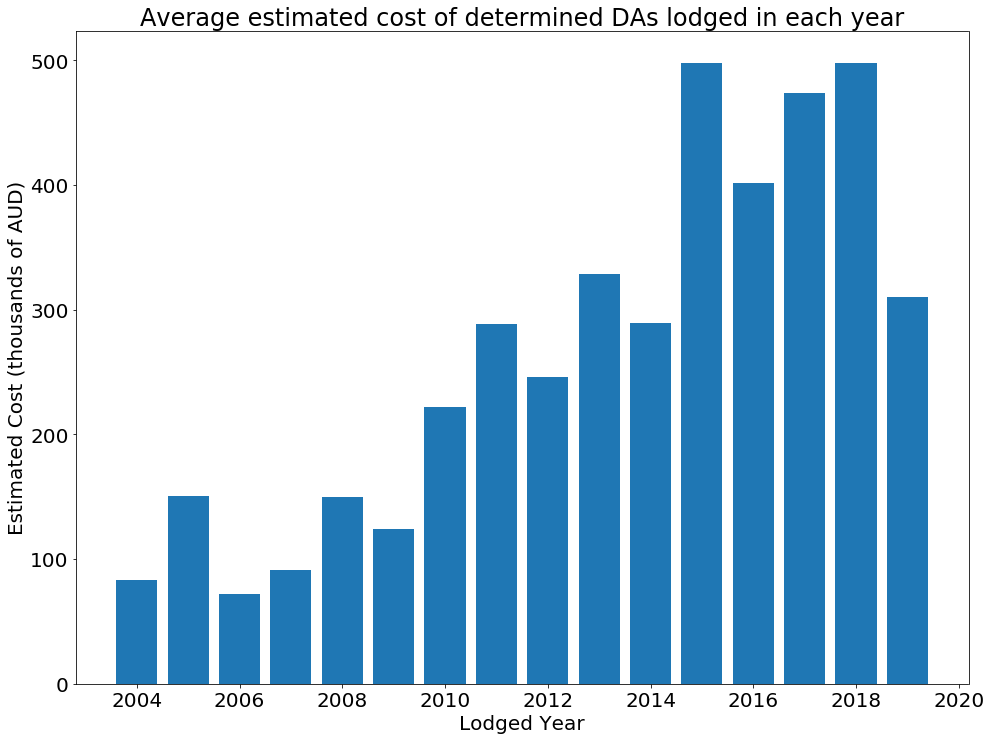

In [15]:
# Plot the average cost of determined DAs per year.
determined_das_average_cost_per_year = determined_da.groupby(determined_da["Lodged Year"])["Est Cost"].mean()

plt.figure(figsize = (16,12))
plt.bar(determined_das_average_cost_per_year.index, determined_das_average_cost_per_year / 10e3)
plt.xlabel("Lodged Year")
plt.ylabel("Estimated Cost (thousands of AUD)")
plt.title("Average estimated cost of determined DAs lodged in each year")
plt.show()

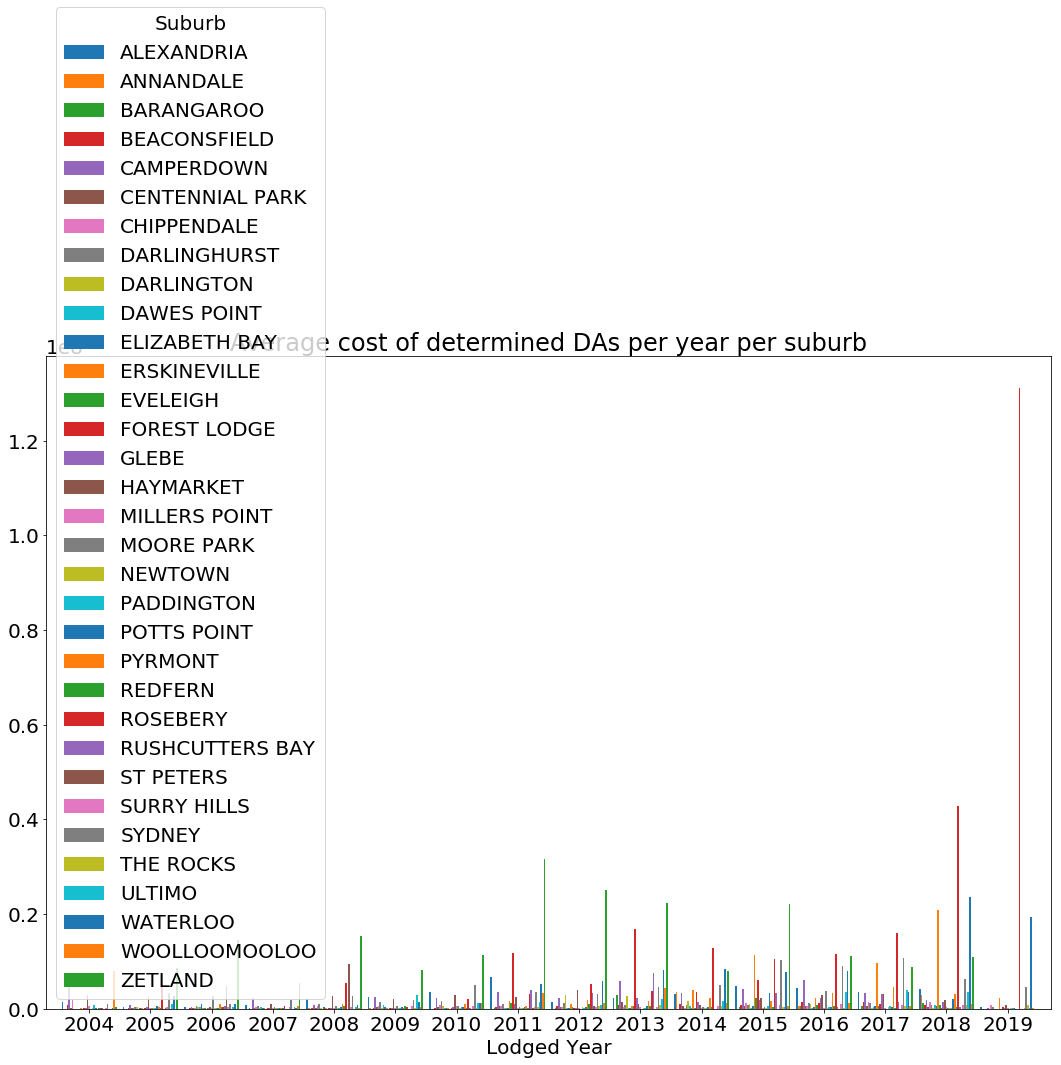

In [16]:
# Plot the average cost of determined DAs per year per suburb.
determined_das_grouped_by_year_and_suburb = determined_da.groupby([determined_da["Lodged Year"], determined_da["Suburb"]])
determined_das_average_cost_per_year_per_suburb = determined_das_grouped_by_year_and_suburb["Est Cost"].mean().unstack()

determined_das_average_cost_per_year_per_suburb.plot.bar(title="Average cost of determined DAs per year per suburb",
                                                         rot=0,
                                                         figsize=(18, 12),
                                                         width=0.9)

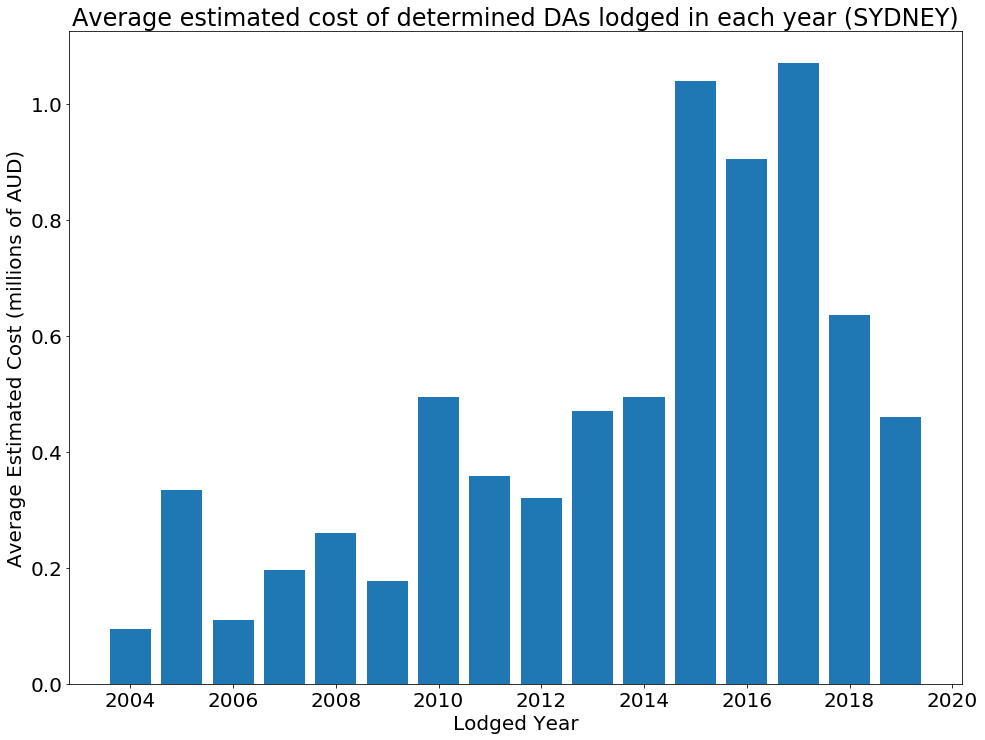

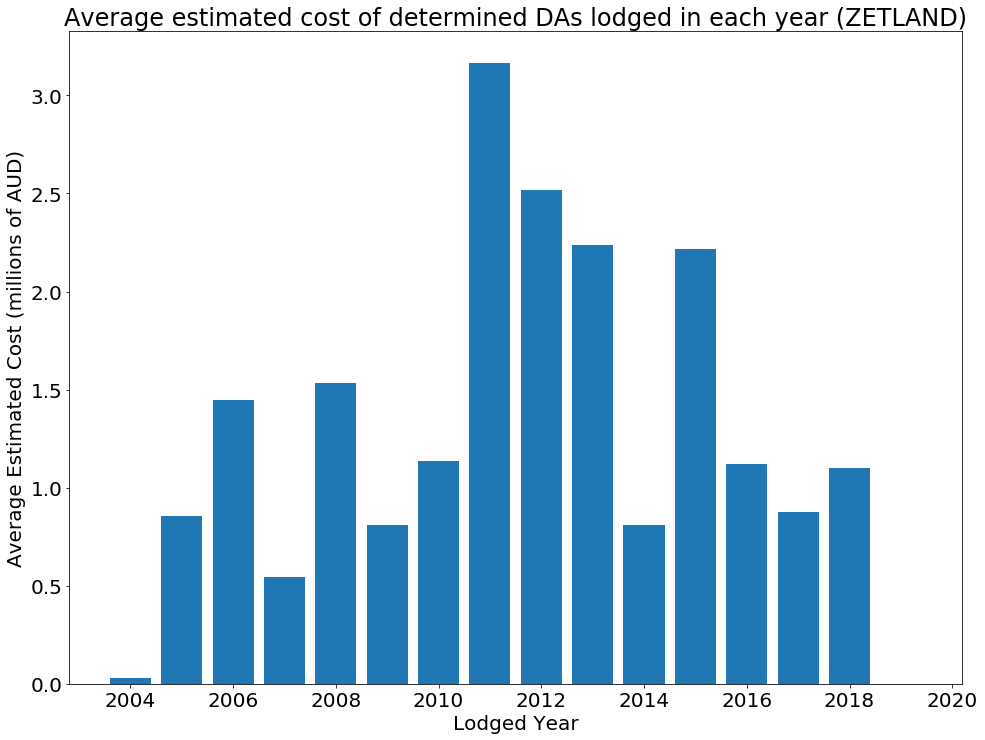

In [17]:
plt.figure(figsize = (16,12))
plt.bar(determined_das_average_cost_per_year_per_suburb.index, determined_das_average_cost_per_year_per_suburb["SYDNEY"] / 10e6)
plt.xlabel("Lodged Year")
plt.ylabel("Average Estimated Cost (millions of AUD)")
plt.title("Average estimated cost of determined DAs lodged in each year (SYDNEY)")
plt.show()

plt.figure(figsize = (16,12))
plt.bar(determined_das_average_cost_per_year_per_suburb.index, determined_das_average_cost_per_year_per_suburb["ZETLAND"] / 10e6)
plt.xlabel("Lodged Year")
plt.ylabel("Average Estimated Cost (millions of AUD)")
plt.title("Average estimated cost of determined DAs lodged in each year (ZETLAND)")
plt.show()